# Bibliothèques

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [ ]:
Breast_Cancer = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/cancer_breast.csv')
Breast_Cancer

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

# Exploration préalable des données - EDA

In [ ]:
# Recherche des valeurs manquantes
Breast_Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Nous constatons qu'il n'y a pas de valeurs manquantes hormis dans la colonne 'Unnamed: 32'

In [ ]:
# Affichage des valeurs uniques de la colonne Unnamed : 32
Breast_Cancer['Unnamed: 32'].unique()

array([nan])

Nous supprimons cette colonne car elle ne comprend que des Nan.

In [ ]:
# Suppression de la colonne Unnamed
Breast_Cancer.drop(['Unnamed: 32'], axis=1, inplace=True)

In [ ]:
# Recherche de lignes en doublons
Breast_Cancer.duplicated().sum()

0

Nous constatons qu'il n'y a pas de doublons.

# Distribution des données

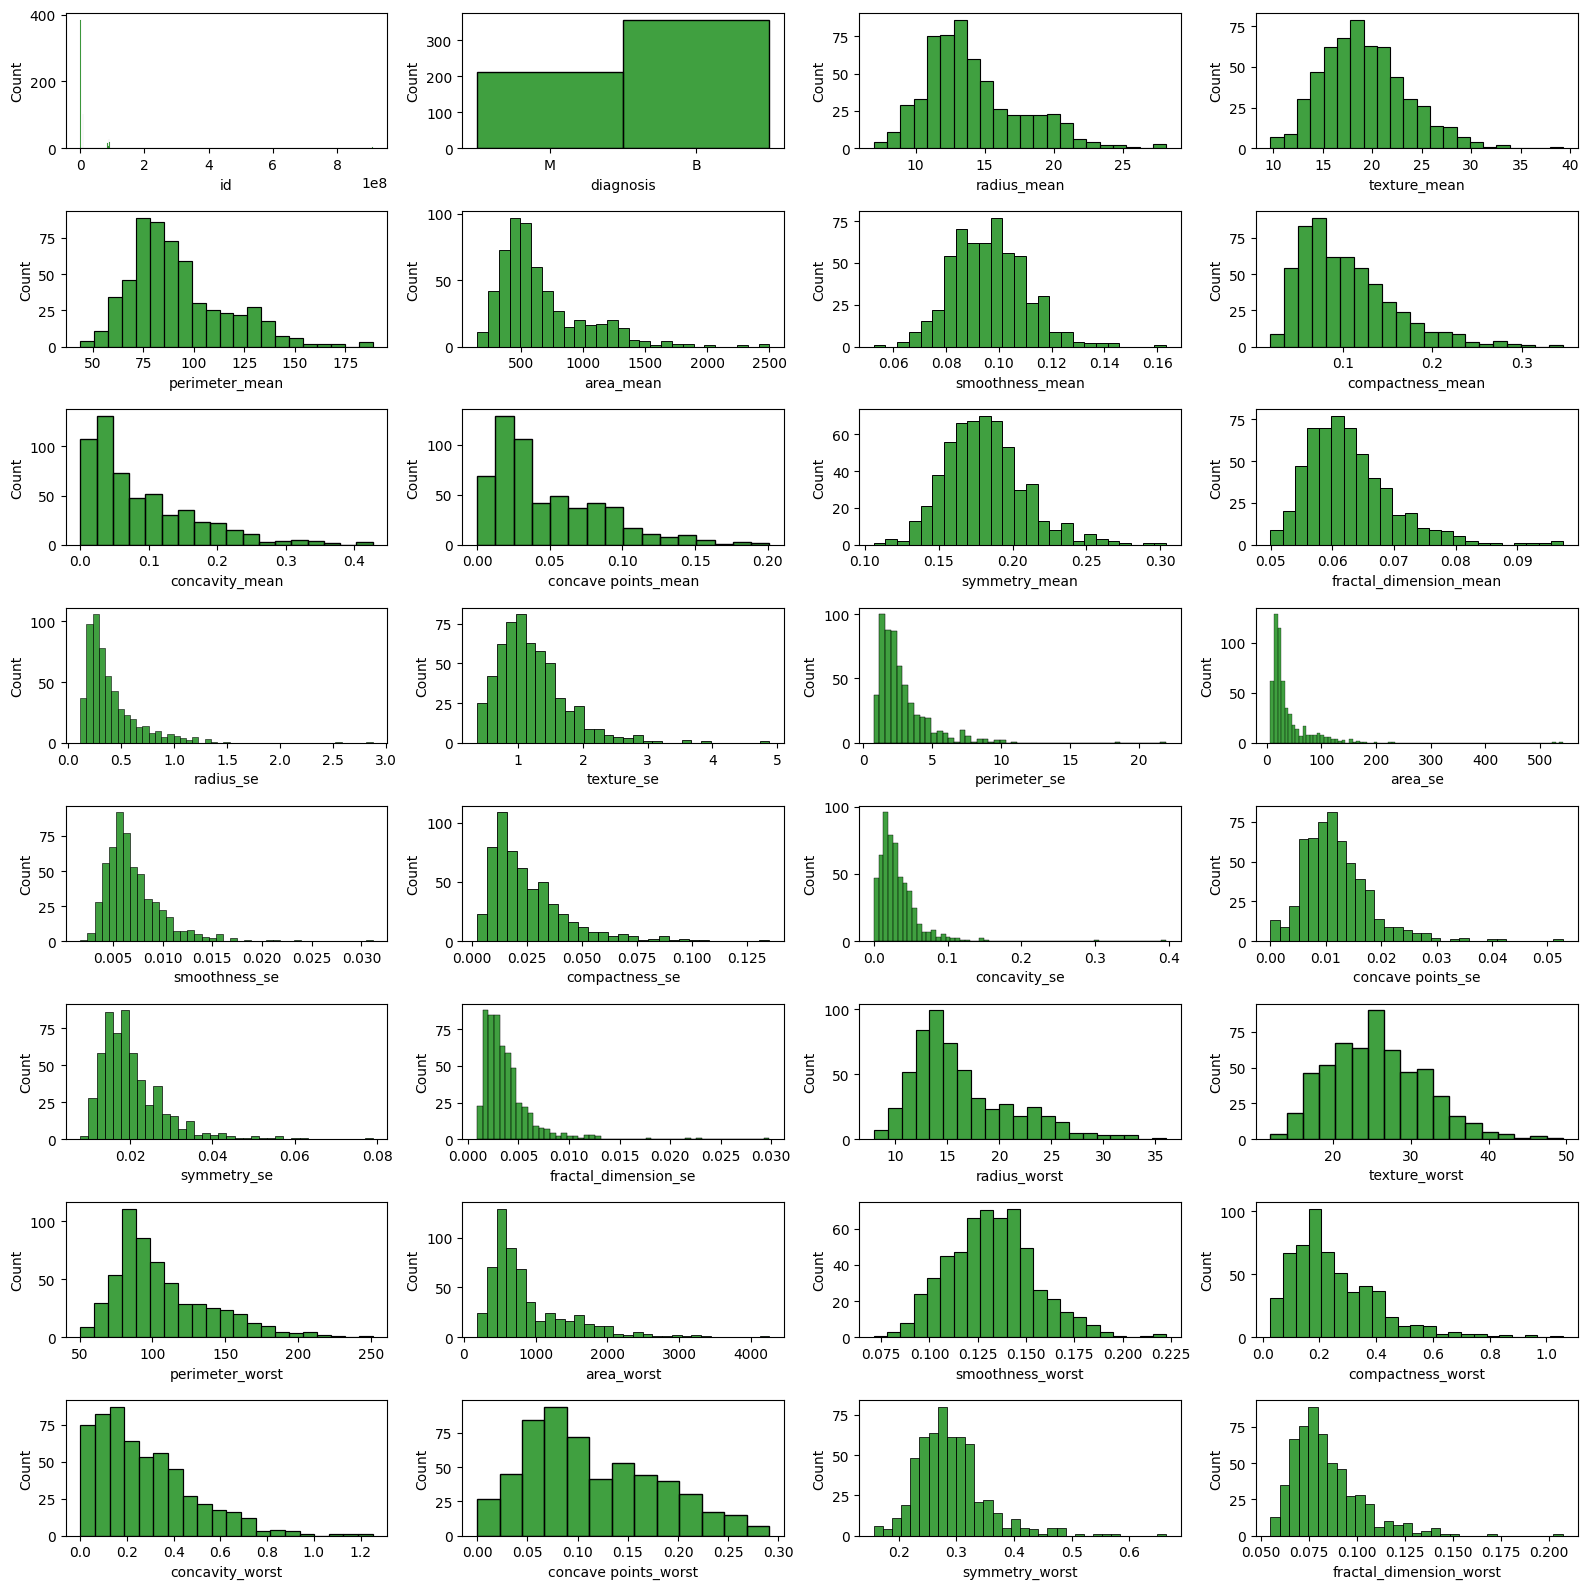

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(16,16))
for i, ax, column in zip(range(33), axes.flat, Breast_Cancer.iloc[:,:].columns):
    sns.histplot(Breast_Cancer.iloc[:,:],x=column,ax=ax,color='g')
plt.tight_layout()
plt.show()

Nous ne constatons pas de valeurs aberrantes.

In [ ]:
# Nous supprimons la colonne "id" qui n'apporte pas d'information sur le cancer
Breast_Cancer.drop(['id'], axis=1, inplace=True)

In [ ]:
# Nous recherchons les valeurs à zéro
zeros = Breast_Cancer.loc[(Breast_Cancer == 0).any(axis=1)]
zeros

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
101         B        6.981         13.43           43.79      143.5   
140         B        9.738         11.97           61.24      288.5   
174         B       10.660         15.15           67.49      349.6   
175         B        8.671         14.45           54.42      227.2   
192         B        9.720         18.22           60.73      288.1   
314         B        8.597         18.60           54.09      221.2   
391         B        8.734         16.84           55.27      234.3   
473         B       12.270         29.97           77.42      465.4   
538         B        7.729         25.49           47.98      178.8   
550         B       10.860         21.48           68.51      360.5   
557         B        9.423         27.88           59.26      271.3   
561         B       11.200         29.37           70.67      386.0   
568         B        7.760         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
101          0.11700           0.07568             0.0                  0.0   
140          0.09250           0.04102             0.0                  0.0   
174          0.08792           0.04302             0.0                  0.0   
175          0.09138           0.04276             0.0                  0.0   
192          0.06950           0.02344             0.0                  0.0   
314          0.10740           0.05847             0.0                  0.0   
391          0.10390           0.07428             0.0                  0.0   
473          0.07699           0.03398             0.0                  0.0   
538          0.08098           0.04878             0.0                  0.0   
550          0.07431           0.04227             0.0                  0.0   
557          0.08123           0.04971             0.0                  0.0   
561          0.07449           0.03558             0.0                  0.0   
568          0.05263           0.04362             0.0                  0.0   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
101         0.1930  ...         7.930          19.54            50.41   
140         0.1903  ...        10.620          14.10            66.53   
174         0.1928  ...        11.540          19.20            73.20   
175         0.1722  ...         9.262          17.04            58.36   
192         0.1653  ...         9.968          20.83            62.25   
314         0.2163  ...         8.952          22.44            56.65   
391         0.1985  ...        10.170          22.80            64.01   
473         0.1701  ...        13.450          38.05            85.08   
538         0.1870  ...         9.077          30.92            57.17   
550         0.1661  ...        11.660          24.77            74.08   
557         0.1742  ...        10.490          34.24            66.50   
561         0.1060  ...        11.920          38.30            75.19   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
101       185.2           0.15840            0.12020              0.0   
140       342.9           0.12340            0.07204              0.0   
174       408.3           0.10760            0.06791              0.0   
175       259.2           0.11620            0.07057              0.0   
192       303.8           0.07117            0.02729              0.0   
314       240.1           0.13470            0.07767              0.0   
391       317.0           0.14600            0.13100              0.0   
473       558.9           0.09422            0.05213              0.0   
538       248.0           0.12560            0.08340              0.0   
550       412.3           0.10010            0.07348              0.0   
557       330.6           0.10730            0.07158              0.0   
561

In [ ]:
print(Breast_Cancer.columns[(Breast_Cancer == 0).any()])

Index(['concavity_mean', 'concave points_mean', 'concavity_se',
       'concave points_se', 'concavity_worst', 'concave points_worst'],
      dtype='object')


Nous constatons qu'il y a 13 lignes avec des valeurs à zéro. Notamment pour les variables sur la concavité. Ces lignes correspondent à des cellules bénignes ne et représentent 2% du dataset. Après réunion avec le client nous avons décidé de les supprimer.

In [ ]:
# Suppression des lignes avec des valeurs à zéro (13 lignes)
index_to_drop = Breast_Cancer.index[(Breast_Cancer == 0).any(axis=1)]
Breast_Cancer = Breast_Cancer.drop(index_to_drop)
Breast_Cancer

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
563         M        20.92         25.09          143.00     1347.0   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
563          0.10990           0.22360         0.31740              0.14740   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...         25.38          17.33           184.60   
1           0.1812  ...         24.99          23.41           158.80   
2           0.2069  ...         23.57          25.53           152.50   
3           0.2597  ...         14.91          26.50            98.87   
4           0.1809  ...         22.54          16.67           152.20   
..             ...  ...           ...            ...              ...   
563         0.2149  ...         24.29          29.41           179.10   
564         0.1726  ...         25.45          26.40           166.10   
565         0.1752  ...         23.69          38.25           155.00   
566         0.1590  ...         18.98          34.12           126.70   
567         0.2397  ...         25.74          39.42           184.60   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0            0.1622             0.6656           0.7119   
1        1956.0            0.1238             0.1866           0.2416   
2        1709.0            0.1444             0.4245           0.4504   
3         567.7            0.2098             0.8663           0.6869   
4        1575.0            0.1374             0.2050           0.4000   
..          ...               ...                ...              ...   
563      1819.0            0.1407             0.4186           0.6599   
564      2027.0            0.1410             0.2113           0.4107   
565      1731.0            0.1166             0.1922           0.3215   
566      1124.0            0.1139             0.3094           0.3403   
567      1821.0            0.1650             0.8681           0.9387   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

Nous constatons que la seule variable objet 'diagnosis' contient deux valeurs uniques : M ou B. Nous supposons qu'il s'agit du diagnostic de la cellule, à savoir Maligne ou Bénigne. (Information confirmée par le client lors d'une réunion).

Pour nos futurs alogorithmes, nous décidons de remplacer ces valeurs texte par des valeurs numériques : 1 pour Maligne et 0 pour Bénigne.

In [ ]:
# Transformation des valeurs Maligne et Bénigne en 1 et 0
Breast_Cancer['diagnosis'] = Breast_Cancer['diagnosis'].replace({'B': 0, 'M': 1})
Breast_Cancer

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
563          1        20.92         25.09          143.00     1347.0   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
563          0.10990           0.22360         0.31740              0.14740   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...         25.38          17.33           184.60   
1           0.1812  ...         24.99          23.41           158.80   
2           0.2069  ...         23.57          25.53           152.50   
3           0.2597  ...         14.91          26.50            98.87   
4           0.1809  ...         22.54          16.67           152.20   
..             ...  ...           ...            ...              ...   
563         0.2149  ...         24.29          29.41           179.10   
564         0.1726  ...         25.45          26.40           166.10   
565         0.1752  ...         23.69          38.25           155.00   
566         0.1590  ...         18.98          34.12           126.70   
567         0.2397  ...         25.74          39.42           184.60   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0            0.1622             0.6656           0.7119   
1        1956.0            0.1238             0.1866           0.2416   
2        1709.0            0.1444             0.4245           0.4504   
3         567.7            0.2098             0.8663           0.6869   
4        1575.0            0.1374             0.2050           0.4000   
..          ...               ...                ...              ...   
563      1819.0            0.1407             0.4186           0.6599   
564      2027.0            0.1410             0.2113           0.4107   
565      1731.0            0.1166             0.1922           0.3215   
566      1124.0            0.1139             0.3094           0.3403   
567      1821.0            0.1650             0.8681           0.9387   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

# Statistiques et corrélations

In [ ]:
Breast_Cancer.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  556.000000   556.000000    556.000000      556.000000   556.000000   
mean     0.381295    14.237565     19.259748       92.736673   663.734712   
std      0.486142     3.482170      4.246993       24.006362   350.893313   
min      0.000000     7.691000      9.710000       48.340000   170.400000   
25%      0.000000    11.760000     16.177500       75.845000   427.750000   
50%      0.000000    13.455000     18.855000       87.090000   557.650000   
75%      1.000000    16.040000     21.735000      105.250000   798.050000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       556.000000        556.000000      556.000000           556.000000   
mean          0.096616          0.105679        0.090876             0.050063   
std           0.013895          0.052643        0.079468             0.038517   
min           0.062510          0.019380        0.000692             0.001852   
25%           0.086665          0.066608        0.030880             0.020895   
50%           0.096035          0.095090        0.064905             0.034840   
75%           0.105400          0.130600        0.132325             0.074842   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     556.000000  ...    556.000000     556.000000       556.000000   
mean        0.181278  ...     16.407687      25.679388       108.242878   
std         0.027446  ...      4.797695       6.105744        33.337041   
min         0.116700  ...      8.678000      12.020000        54.490000   
25%         0.161900  ...     13.085000      21.160000        84.567500   
50%         0.179250  ...     15.040000      25.445000        98.320000   
75%         0.195750  ...     19.097500      29.547500       126.750000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   556.000000        556.000000         556.000000       556.000000   
mean    893.412410          0.132824           0.258472         0.278553   
std     569.492912          0.022616           0.156663         0.206803   
min     223.600000          0.081250           0.034320         0.001845   
25%     521.450000          0.117175           0.151175         0.121800   
50%     696.050000          0.131550           0.217000         0.231400   
75%    1106.750000          0.146325           0.341600         0.386200   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            556.000000      556.000000               556.000000  
mean               0.117286        0.290802                 0.084141  
std                0.064087        0.062027                 0.018130  
min                0.008772        0.156500                 0.055040  
25%                0.065713        0.250900                 0.071873  
50%                0.101700        0.282450                 0.080075  
75%                0.163150        0.318850                 0.092095  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

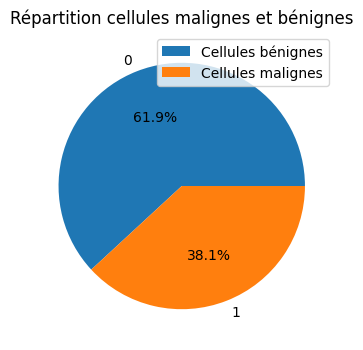

In [ ]:
# Part des cellules malignes et bénignes
plt.figure(figsize=(4, 4))
pie_chart = Breast_Cancer['diagnosis'].value_counts()
plt.pie(data = pie_chart, x = pie_chart, labels = pie_chart.index, autopct = '%1.1f%%')
plt.title('Répartition cellules malignes et bénignes')
legend_labels = ['Cellules bénignes' if label == 0 else 'Cellules malignes' for label in pie_chart.index]
plt.legend(labels=legend_labels, loc='upper right')
plt.show()

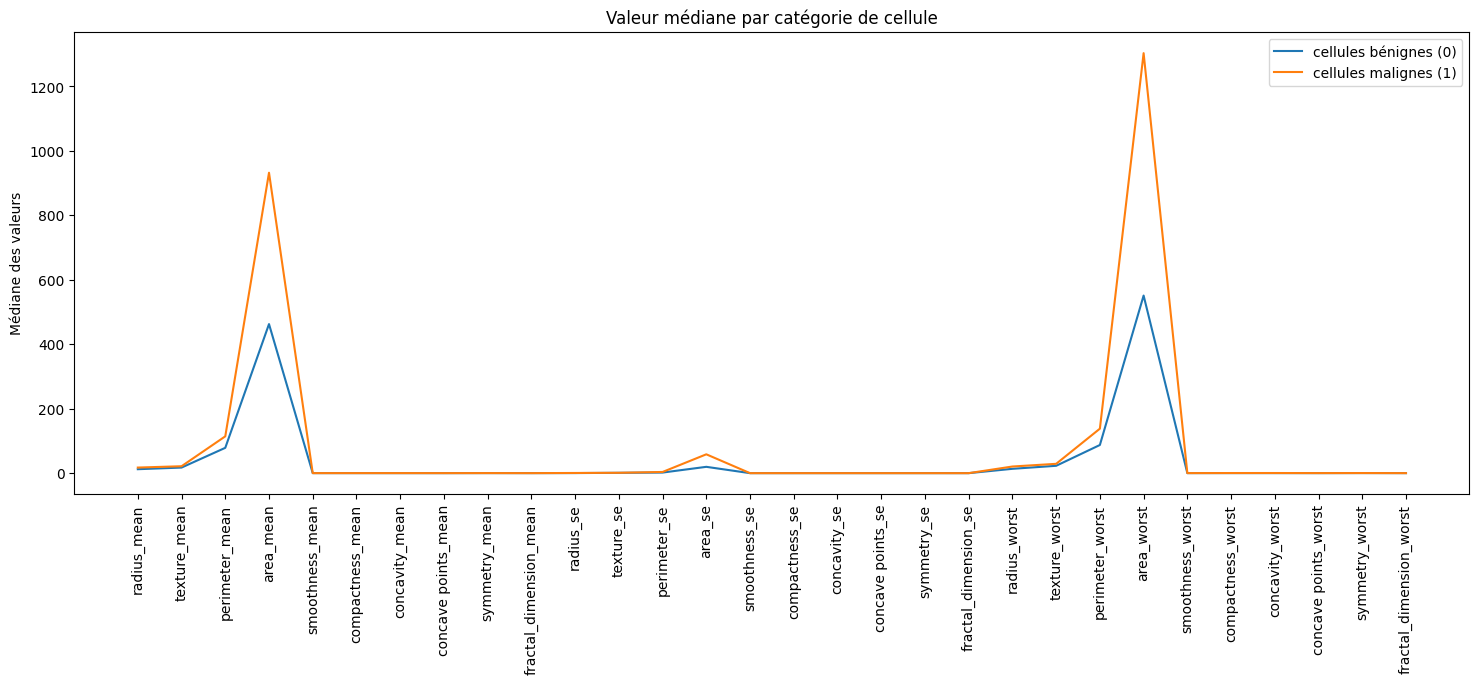

In [ ]:
# Valeur médiane par catégorie de cellule
df_1 = Breast_Cancer[Breast_Cancer['diagnosis'] == 1].drop(columns='diagnosis').median()
df_0 = Breast_Cancer[Breast_Cancer['diagnosis'] == 0].drop(columns='diagnosis').median()
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_0, label='cellules bénignes (0)')
sns.lineplot(data=df_1, label='cellules malignes (1)')
plt.xticks(rotation=90)
plt.ylabel('Médiane des valeurs')
plt.title('Valeur médiane par catégorie de cellule')
plt.legend()
plt.show()

Ce graphique n'est pas représentatif car il y a des échelles de valeurs différentes. Nous allons donc filtrer les valeurs par tranche pour ajuster l'échelle et créer trois graphiques.

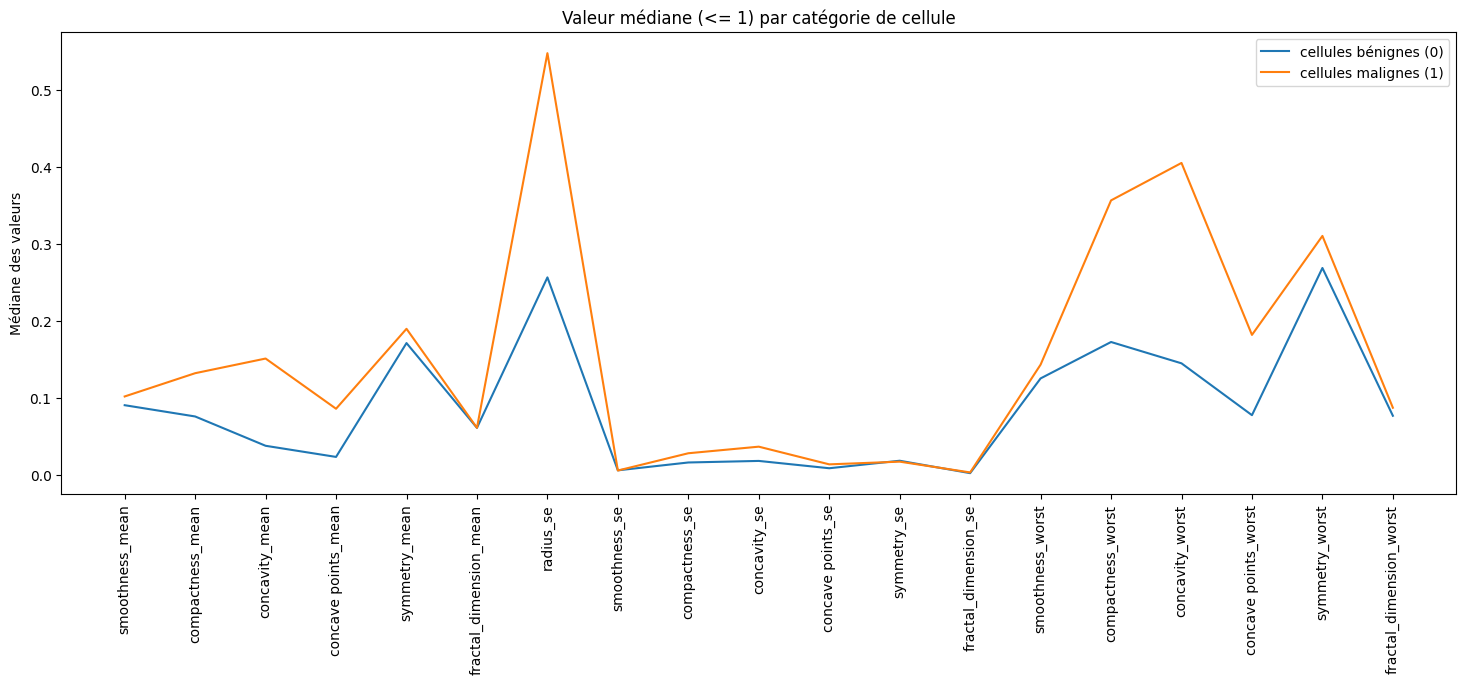

In [ ]:
# Ajustement de l'échelle des valeurs
df_1 = Breast_Cancer[Breast_Cancer['diagnosis'] == 1].drop(columns='diagnosis').median()
df_0 = Breast_Cancer[Breast_Cancer['diagnosis'] == 0].drop(columns='diagnosis').median()
# Filtre pour les valeurs médianes
filtre_1 = (df_1 <= 1)
filtre_2 = ((df_1 > 1) & (df_1 <= 60))
filtre_3 = (df_1 > 60)

filtre_1_0 = (df_0 <= 1)
filtre_2_0 = ((df_0 > 1) & (df_0 <= 60))
filtre_3_0 = (df_0 > 60)

# Premier graphique avec les colonnes dont la valeur médiane est inférieure ou égale à 1
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_0[filtre_1_0], label='cellules bénignes (0)')
sns.lineplot(data=df_1[filtre_1], label='cellules malignes (1)')
plt.xticks(rotation=90)
plt.ylabel('Médiane des valeurs')
plt.title('Valeur médiane (<= 1) par catégorie de cellule')
plt.legend()
plt.show()

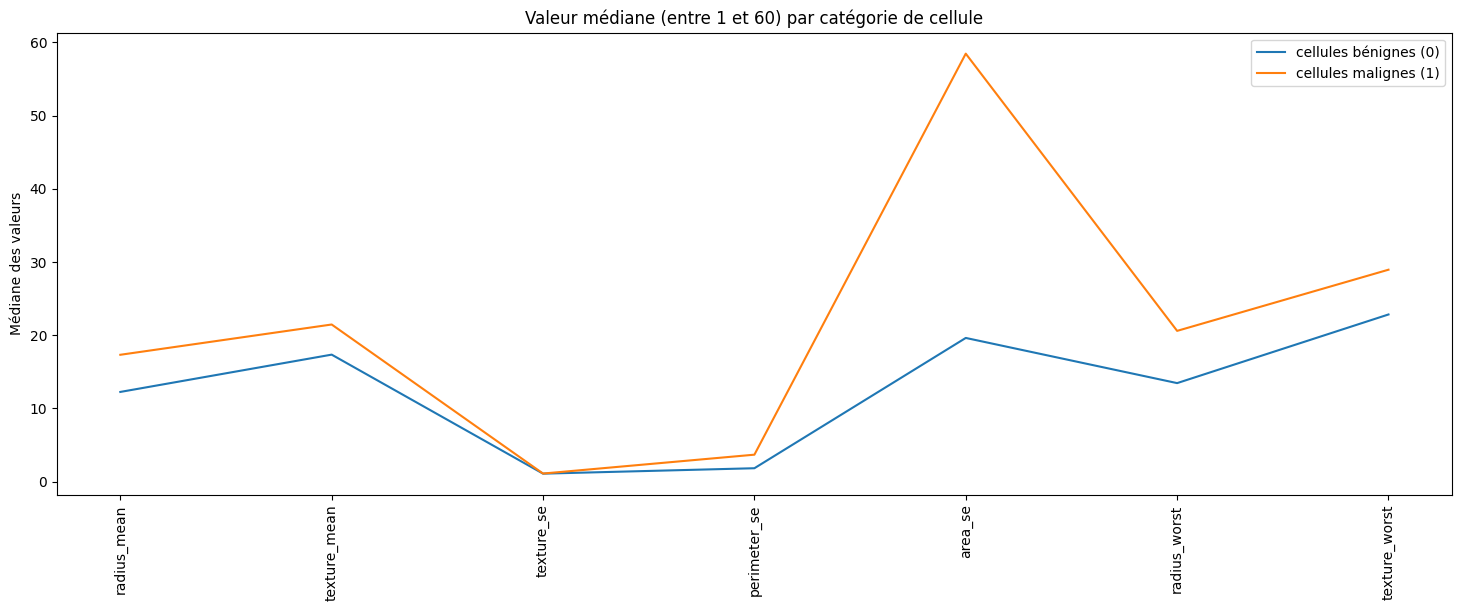

In [ ]:
# Deuxième graphique avec les colonnes dont la valeur médiane est comprise entre 1 et 60
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_0[filtre_2_0], label='cellules bénignes (0)')
sns.lineplot(data=df_1[filtre_2], label='cellules malignes (1)')
plt.xticks(rotation=90)
plt.ylabel('Médiane des valeurs')
plt.title('Valeur médiane (entre 1 et 60) par catégorie de cellule')
plt.legend()
plt.show()

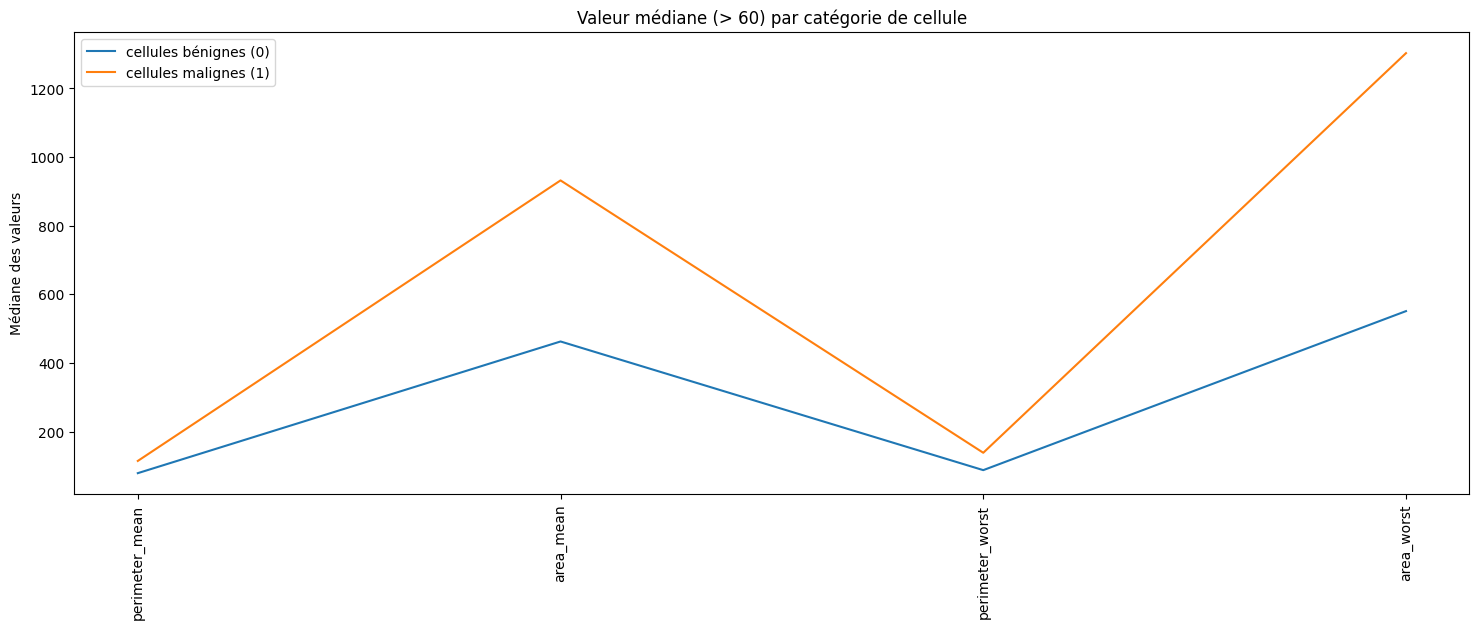

In [ ]:
# Troisième graphique avec les colonnes dont la valeur médiane est supérieure à 60
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_0[filtre_3_0], label='cellules bénignes (0)')
sns.lineplot(data=df_1[filtre_3], label='cellules malignes (1)')
plt.xticks(rotation=90)
plt.ylabel('Médiane des valeurs')
plt.title('Valeur médiane (> 60) par catégorie de cellule')
plt.legend()
plt.show()

In [ ]:
liste_colonnes = Breast_Cancer.columns.tolist()
print(liste_colonnes)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


Au vu de ces trois graphiques nous pouvons constater que certaines variables sont déterminantes pour définir l'état de la cellule maligne ou bénigne.
Nous les listons ci_dessous :
`'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'radius_mean', 'texture_mean', 'area_se', 'radius_worst', 'texture_worst', 'area_worst' et 'area_mean'.`

Soit 15 variables sur 30.







Nous allons maintenant étudier la corrélation des variables.

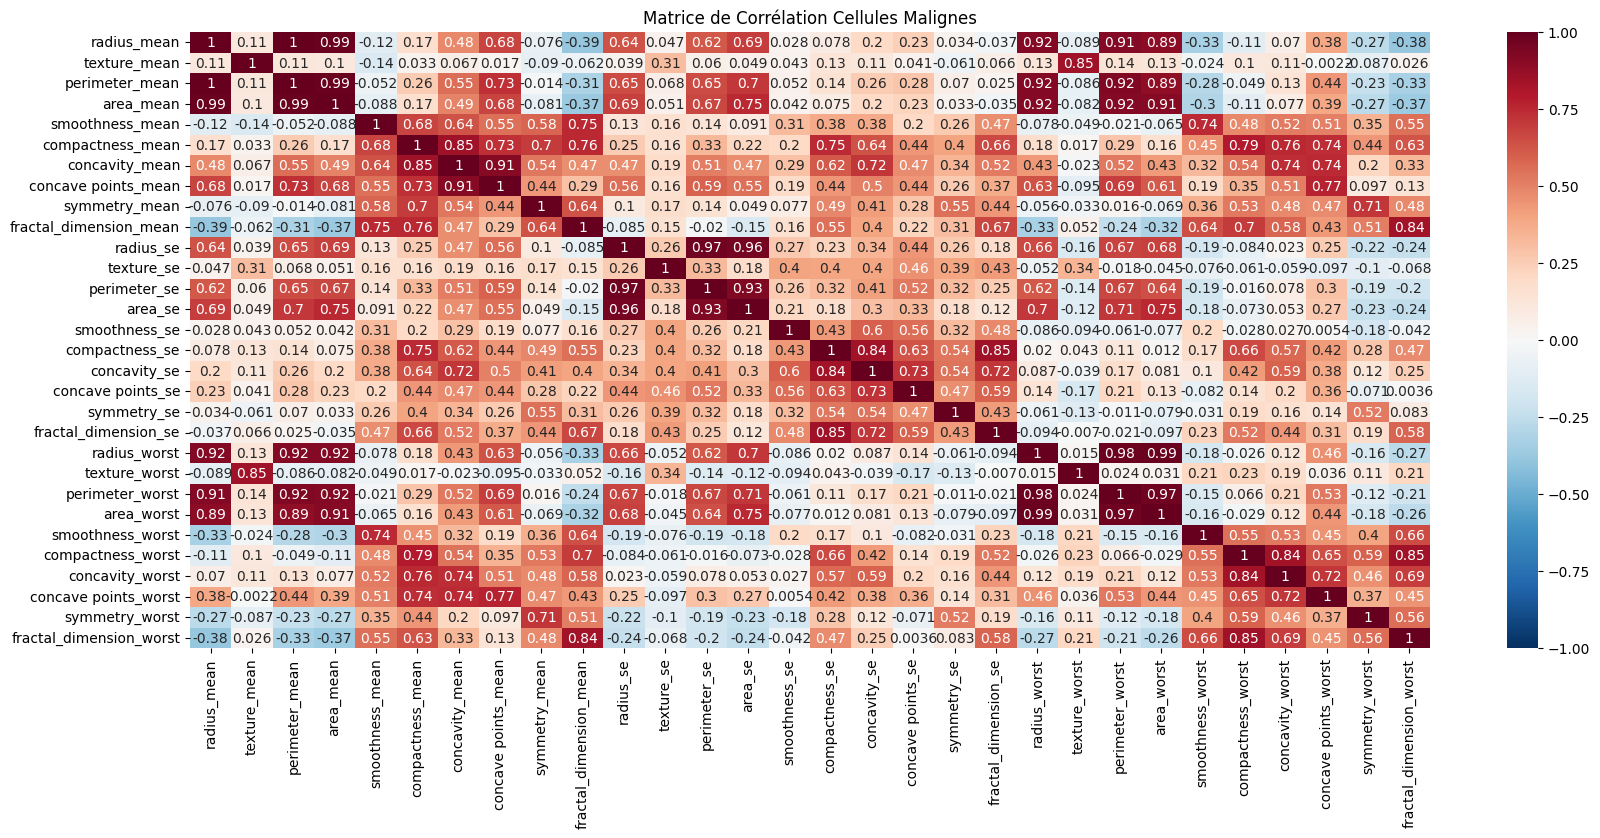

In [ ]:
# Heatmap avec cellules malignes
df_1 = Breast_Cancer[Breast_Cancer['diagnosis'] == 1].drop(columns='diagnosis')
plt.figure(figsize=(20, 8))
sns.heatmap(df_1.corr(), cmap="RdBu_r", annot=True, vmin=-1, vmax=1)
plt.title("Matrice de Corrélation Cellules Malignes")
plt.show()

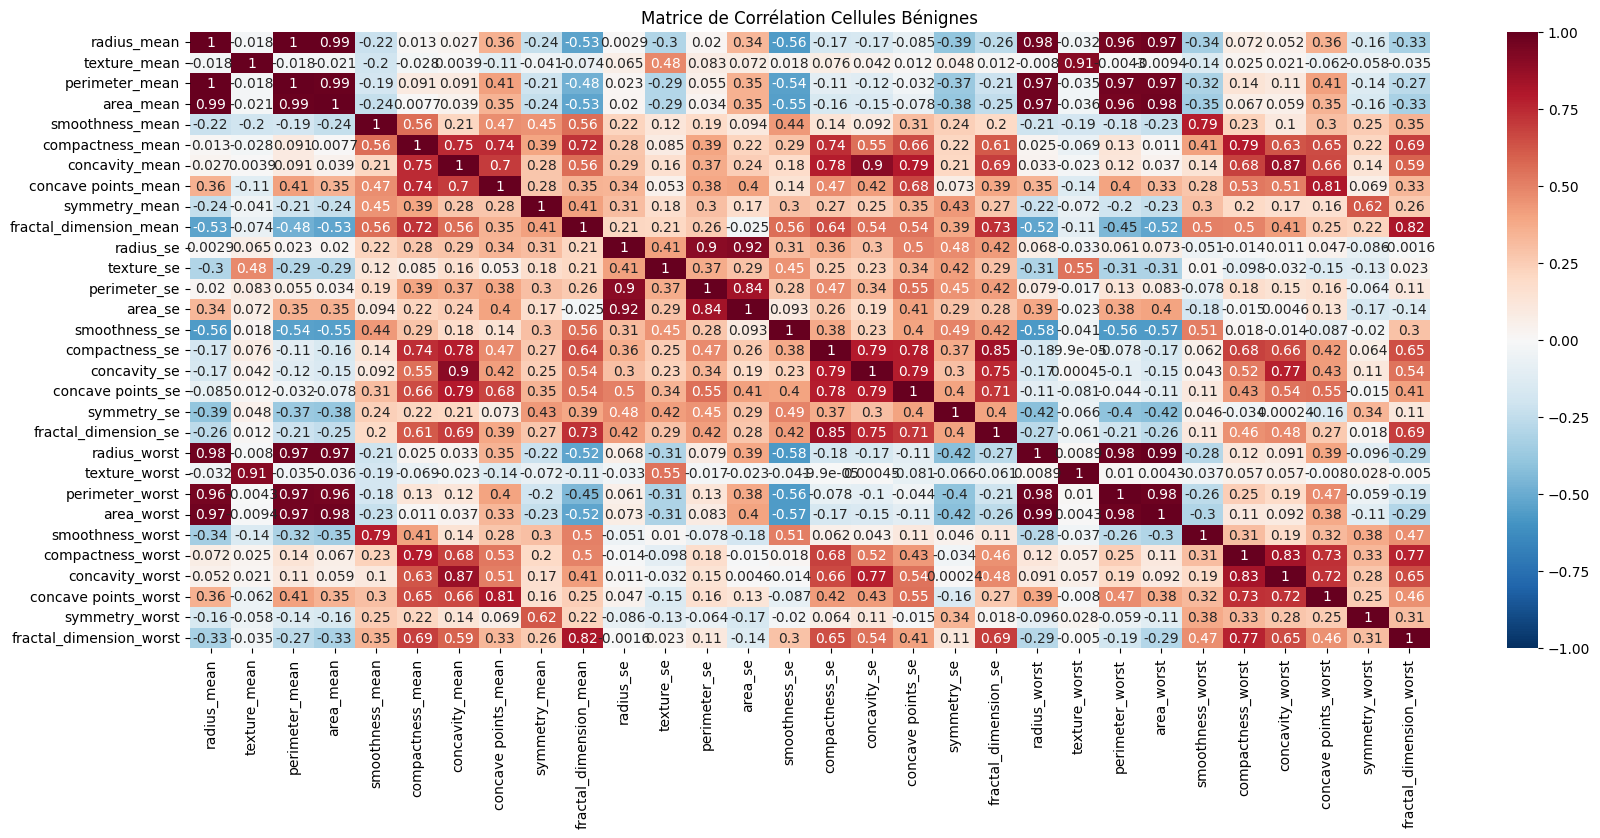

In [ ]:
# Heatmap avec cellules bénignes
df_0 = Breast_Cancer[Breast_Cancer['diagnosis'] == 0].drop(columns='diagnosis')
plt.figure(figsize=(20, 8))
sns.heatmap(df_0.corr(), cmap="RdBu_r", annot=True, vmin=-1, vmax=1)
plt.title("Matrice de Corrélation Cellules Bénignes")
plt.show()

Nous pouvons constater que certaines variables ont une forte corrélation positive, ce qui pourrait poser problème dans nos futurs algorithmes de Machine Learning (difficulté d'attribution de l'importance de chaque variable, surajustement, etc.).
Les variables couples avec une corrélation supérieur ou égal à 0.96 sont :
```
radius_mean / perimeter_mean
radius_mean / area_mean
perimeter_mean / area_mean
```
```
radius_worst / perimeter_worst
radius_worst / area_worst
perimeter_worst / area_worst
```
```
radius_se / perimeter_se
radius_se / area_se
perimeter_se / area_se
```

Nous constatons tout d'abord qu'il s'agit des mêmes variables : radius, area, perimeter, avec des métriques différentes : moyenne (mean), la plus mauvaise (worst), erreur (se).

Nous constatons ensuite que les variables corrélées sont le rayon, l'aire et le périmètre de la cellule, ce qui est normal puisque ces trois données sont liées, c'est mathématique.

Après vérification auprès du client nous décidons de retenir pour nos algorithmes, les variables avec la métrique de la moyenne (mean) et des trois corrélées uniquement l'aire (area).

In [ ]:
# Création d'un dataframe 'df_clean' avec les seules variables conservées
df_clean = Breast_Cancer[['diagnosis',
                          'texture_mean',
                          'area_mean',
                          'smoothness_mean',
                          'compactness_mean',
                          'concavity_mean',
                          'concave points_mean',
                          'symmetry_mean',
                          'fractal_dimension_mean',]]
df_clean

diagnosis  texture_mean  area_mean  smoothness_mean  compactness_mean  \
0            1         10.38     1001.0          0.11840           0.27760   
1            1         17.77     1326.0          0.08474           0.07864   
2            1         21.25     1203.0          0.10960           0.15990   
3            1         20.38      386.1          0.14250           0.28390   
4            1         14.34     1297.0          0.10030           0.13280   
..         ...           ...        ...              ...               ...   
563          1         25.09     1347.0          0.10990           0.22360   
564          1         22.39     1479.0          0.11100           0.11590   
565          1         28.25     1261.0          0.09780           0.10340   
566          1         28.08      858.1          0.08455           0.10230   
567          1         29.33     1265.0          0.11780           0.27700   

     concavity_mean  concave points_mean  symmetry_mean  \
0           0.30010              0.14710         0.2419   
1           0.08690              0.07017         0.1812   
2           0.19740              0.12790         0.2069   
3           0.24140              0.10520         0.2597   
4           0.19800              0.10430         0.1809   
..              ...                  ...            ...   
563         0.31740              0.14740         0.2149   
564         0.24390              0.13890         0.1726   
565         0.14400              0.09791         0.1752   
566         0.09251              0.05302         0.1590   
567         0.35140              0.15200         0.2397   

     fractal_dimension_mean  
0                   0.07871  
1                   0.05667  
2                   0.05999  
3                   0.09744  
4                   0.05883  
..                      ...  
563                 0.06879  
564                 0.05623  
565                 0.05533  
566                 0.05648  
567                 0.07016  

[556 rows x 9 columns]

# Machine Learning

Nous recherchons la meilleure combinaison entre modèle, scaler, et suréchantillonage, afin d'obtenir le meilleur score possible.

Nous utilisons également la méthode d'apprentissage du "réseau neuronal" pour rechercher le meilleur modèle de prédiction (modèle MLPClassifier).

## Bibliothèques ML

In [ ]:
pip install scikit-learn pandas imbalanced-learn

In [ ]:
# Bibliothèques
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## Algorithme

### Accuracy

L'accuracy mesure la proportion de prédictions correctes parmi l'ensemble total des prédictions.

In [ ]:
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Liste des modèles à tester
models = [
    LinearSVC(),
    SVC(),
    NuSVC(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    HistGradientBoostingClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier()
]

# Liste des scalers à tester
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), QuantileTransformer(), PowerTransformer()]

# Liste des options pour suréchantillonnage : sans (none) ou avec (RandomOverSampler)
resampling_options = [None, RandomOverSampler(random_state=42)]

# Liste pour stocker les résultats
results_list = []

# StratifiedKFold pour maintenir la distribution des classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Boucles pour tester chaque combinaison de modèle, scaler et suréchantillonnage
for model in models:
    for scaler in scalers:
        for resampling_option in resampling_options:
            # Création d'un pipeline avec le modèle, le scaler et l'option de suréchantillonnage
            if resampling_option is not None:
                pipeline = ImbPipeline([
                    ('resampling', resampling_option),
                    ('scaler', scaler),
                    ('model', model)
                ])
            else:
                pipeline = ImbPipeline([
                    ('scaler', scaler),
                    ('model', model)
                ])

            # Paramètres à tester par défaut
            param_grid = {}

            # Recherche de grille avec cross-validation
            grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=cv)
            grid_search.fit(X_train, y_train)

            # Entraînement final sur l'ensemble d'entraînement complet
            best_pipeline = grid_search.best_estimator_
            best_pipeline.fit(X_train, y_train)

            # Prédictions
            y_pred = best_pipeline.predict(X_test)

            # Score
            accuracy = accuracy_score(y_test, y_pred)

            # Ajout des résultats à la liste
            results_list.append({
                "Model": model.__class__.__name__,
                "Scaler": scaler.__class__.__name__,
                "Resampling": resampling_option.__class__.__name__ if resampling_option is not None else "None",
                "Accuracy": accuracy
            })

# Affichage des résultats
for result in results_list:
    print(result)

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
n_quantiles (1000) is greater than the total number of samples (355). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (355). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (355). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (355). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (356). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (444). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of sa

{'Model': 'LinearSVC', 'Scaler': 'StandardScaler', 'Resampling': 'None', 'Accuracy': 0.9375}
{'Model': 'LinearSVC', 'Scaler': 'StandardScaler', 'Resampling': 'RandomOverSampler', 'Accuracy': 0.8839285714285714}
{'Model': 'LinearSVC', 'Scaler': 'MinMaxScaler', 'Resampling': 'None', 'Accuracy': 0.9285714285714286}
{'Model': 'LinearSVC', 'Scaler': 'MinMaxScaler', 'Resampling': 'RandomOverSampler', 'Accuracy': 0.9464285714285714}
{'Model': 'LinearSVC', 'Scaler': 'RobustScaler', 'Resampling': 'None', 'Accuracy': 0.9375}
{'Model': 'LinearSVC', 'Scaler': 'RobustScaler', 'Resampling': 'RandomOverSampler', 'Accuracy': 0.8839285714285714}
{'Model': 'LinearSVC', 'Scaler': 'MaxAbsScaler', 'Resampling': 'None', 'Accuracy': 0.9285714285714286}
{'Model': 'LinearSVC', 'Scaler': 'MaxAbsScaler', 'Resampling': 'RandomOverSampler', 'Accuracy': 0.9285714285714286}
{'Model': 'LinearSVC', 'Scaler': 'QuantileTransformer', 'Resampling': 'None', 'Accuracy': 0.9375}
{'Model': 'LinearSVC', 'Scaler': 'QuantileTran

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
# Création du DataFrame à partir de la liste de résultats
df_results = pd.DataFrame(results_list)

# Pivot du DataFrame pour avoir les scalers comme entête de colonne
df_pivot = df_results.pivot_table(index=['Model', 'Resampling'], columns='Scaler', values='Accuracy')

# Réinitialisation de l'index pour avoir les colonnes 'Model' et 'Resampling'
df_pivot = df_pivot.reset_index()

# Suppression du nom de l'index (Scaler) pour avoir un DataFrame plus propre
df_pivot.columns.name = None

df_pivot

Model         Resampling  MaxAbsScaler  \
0               AdaBoostClassifier               None      0.892857   
1               AdaBoostClassifier  RandomOverSampler      0.919643   
2           DecisionTreeClassifier               None      0.928571   
3           DecisionTreeClassifier  RandomOverSampler      0.901786   
4             ExtraTreesClassifier               None      0.946429   
5             ExtraTreesClassifier  RandomOverSampler      0.955357   
6       GradientBoostingClassifier               None      0.937500   
7       GradientBoostingClassifier  RandomOverSampler      0.928571   
8   HistGradientBoostingClassifier               None      0.919643   
9   HistGradientBoostingClassifier  RandomOverSampler      0.937500   
10                       LinearSVC               None      0.928571   
11                       LinearSVC  RandomOverSampler      0.928571   
12                   MLPClassifier               None      0.919643   
13                   MLPClassifier  RandomOverSampler      0.919643   
14                           NuSVC               None      0.919643   
15                           NuSVC  RandomOverSampler      0.937500   
16          RandomForestClassifier               None      0.946429   
17          RandomForestClassifier  RandomOverSampler      0.955357   
18                             SVC               None      0.964286   
19                             SVC  RandomOverSampler      0.928571   

    MinMaxScaler  PowerTransformer  QuantileTransformer  RobustScaler  \
0       0.892857          0.892857             0.892857      0.892857   
1       0.919643          0.919643             0.919643      0.919643   
2       0.928571          0.946429             0.937500      0.937500   
3       0.901786          0.910714             0.910714      0.910714   
4       0.946429          0.946429             0.955357      0.955357   
5       0.955357          0.937500             0.946429      0.955357   
6       0.937500          0.946429             0.937500      0.937500   
7       0.928571          0.937500             0.928571      0.928571   
8       0.919643          0.919643             0.919643      0.919643   
9       0.937500          0.937500             0.937500      0.937500   
10      0.928571          0.937500             0.937500      0.937500   
11      0.946429          0.919643             0.919643      0.883929   
12      0.928571          0.937500             0.919643      0.937500   
13      0.928571          0.919643             0.910714      0.928571   
14      0.937500          0.955357             0.937500      0.937500   
15      0.892857          0.946429             0.946429      0.892857   
16      0.955357          0.946429             0.937500      0.946429   
17      0.955357          0.946429             0.955357      0.955357   
18      0.937500          0.955357             0.946429      0.946429   
19      0.919643          0.928571             0.919643      0.919643   

    StandardScaler  
0         0.892857  
1         0.919643  
2         0.946429  
3         0.910714  
4         0.955357  
5         0.946429  
6         0.937500  
7         0.928571  
8         0.919643  
9         0.937500  
10        0.937500  
11        0.883929  
12        0.946429  
13        0.919643  
14        0.946429  
15        0.892857  
16        0.946429  
17        0.964286  
18        0.946429  
19        0.919643

In [ ]:
# Création du DataFrame à partir de la liste de résultats
df_results = pd.DataFrame(results_list)

# Recherche l'index du meilleur score pour chaque combinaison de modèle
best_index = df_results.groupby('Model')['Accuracy'].idxmax()

# Filtre du DataFrame d'origine pour obtenir les lignes correspondant aux meilleurs scores
df_final = df_results.loc[best_index]

# Réinitialisation de l'index
df_final = df_final.reset_index(drop=True)

# Suppression des colonnes inutiles liées aux différents scalers
scaler_columns = ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler', 'QuantileTransformer', 'PowerTransformer']
df_final = df_final.drop(columns=scaler_columns, errors='ignore')

# Renommage des colonnes
df_final = df_final.rename(columns={'Accuracy': 'BestScore'})
df_final = df_final.rename(columns={'Scaler': 'BestScaler'})

# Réinitialisation de l'index après le tri
df_final = df_final.reset_index(drop=True)

df_final

Model        BestScaler         Resampling  \
0              AdaBoostClassifier    StandardScaler  RandomOverSampler   
1          DecisionTreeClassifier    StandardScaler               None   
2            ExtraTreesClassifier    StandardScaler               None   
3      GradientBoostingClassifier  PowerTransformer               None   
4  HistGradientBoostingClassifier    StandardScaler  RandomOverSampler   
5                       LinearSVC      MinMaxScaler  RandomOverSampler   
6                   MLPClassifier    StandardScaler               None   
7                           NuSVC  PowerTransformer               None   
8          RandomForestClassifier    StandardScaler  RandomOverSampler   
9                             SVC      MaxAbsScaler               None   

   BestScore  
0   0.919643  
1   0.946429  
2   0.955357  
3   0.946429  
4   0.937500  
5   0.946429  
6   0.946429  
7   0.955357  
8   0.964286  
9   0.964286

In [ ]:
# Trie de la colonne BestScore par ordre décroissant
df_final = df_final.sort_values(by='BestScore', ascending=False)

In [ ]:
# Ajout d'une colonne id avec la lettre A pour accuracy et un nombre pour le numéro de la combinaison (model/bestscaler/resampling)
df_final['Combination'] = ['C' + str(i + 1) for i in range(len(df_final))]

Test égalment fait avec 'RandomizedSearchCV' mais nous n'avons pas obtenu de meilleur résultat que le Grindsearch Classique avec les paramètres par défaut.

In [ ]:
# Création d'un dictionnaire
columns_to_include = ['Model', 'BestScaler', 'Resampling']
combinations_dict = df_final[columns_to_include].to_dict(orient='records')
combinations_dict

[{'Model': 'SVC', 'BestScaler': 'MaxAbsScaler', 'Resampling': 'None'},
 {'Model': 'ExtraTreesClassifier',
  'BestScaler': 'RobustScaler',
  'Resampling': 'None'},
 {'Model': 'MLPClassifier',
  'BestScaler': 'PowerTransformer',
  'Resampling': 'None'},
 {'Model': 'NuSVC', 'BestScaler': 'PowerTransformer', 'Resampling': 'None'},
 {'Model': 'RandomForestClassifier',
  'BestScaler': 'StandardScaler',
  'Resampling': 'RandomOverSampler'},
 {'Model': 'DecisionTreeClassifier',
  'BestScaler': 'RobustScaler',
  'Resampling': 'None'},
 {'Model': 'GradientBoostingClassifier',
  'BestScaler': 'PowerTransformer',
  'Resampling': 'None'},
 {'Model': 'LinearSVC',
  'BestScaler': 'MinMaxScaler',
  'Resampling': 'RandomOverSampler'},
 {'Model': 'HistGradientBoostingClassifier',
  'BestScaler': 'StandardScaler',
  'Resampling': 'RandomOverSampler'},
 {'Model': 'AdaBoostClassifier',
  'BestScaler': 'StandardScaler',
  'Resampling': 'RandomOverSampler'}]

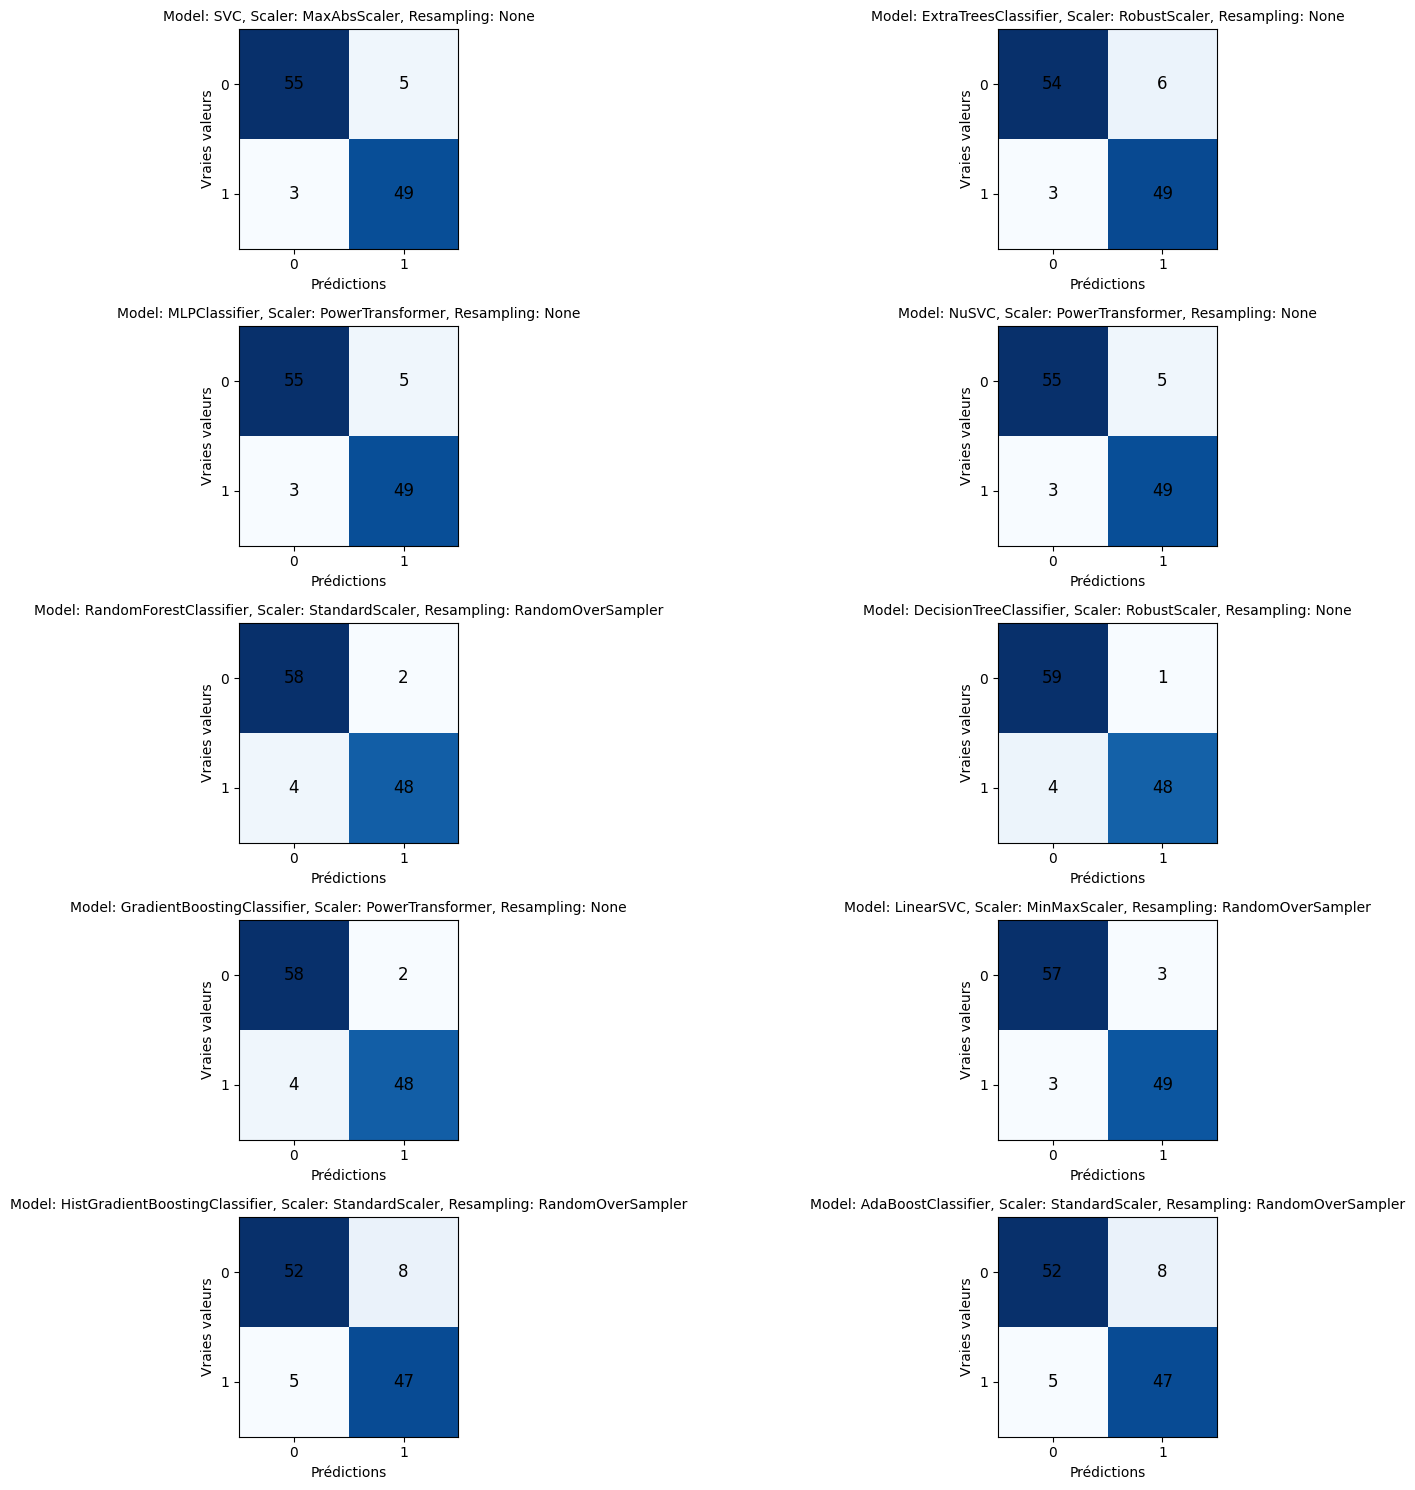

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as make_imb_pipeline
import matplotlib.pyplot as plt

# Nombre de lignes et de colonnes pour l'affichage
num_rows = 5
num_cols = 2

# Nouvelle taille de la figure globale
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Boucle sur les combinaisons pour créer et afficher les matrices de confusion
for i, combination in enumerate(combinations_dict):
    model_name = combination["Model"]
    best_scaler = combination["BestScaler"]
    best_resampling = combination["Resampling"]

    # Conversion du nom du scaler en une instance réelle
    if best_scaler == 'StandardScaler':
        scaler = StandardScaler()
    elif best_scaler == 'MinMaxScaler':
        scaler = MinMaxScaler()
    elif best_scaler == 'RobustScaler':
        scaler = RobustScaler()
    elif best_scaler == 'MaxAbsScaler':
        scaler = MaxAbsScaler()
    elif best_scaler == 'QuantileTransformer':
        scaler = QuantileTransformer()
    elif best_scaler == 'PowerTransformer':
        scaler = PowerTransformer()
    else:
        raise ValueError(f"Scaler inconnu : {best_scaler}")

    # Conversion du nom du modèle en une instance réelle
    if model_name == 'LinearSVC':
        model = LinearSVC()
    elif model_name == 'SVC':
        model = SVC()
    elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier()

    # Création du pipeline avec le modèle, le scaler et l'option de suréchantillonnage
    steps = []
    if best_resampling is not None:
        steps.append(('resampling', RandomOverSampler(random_state=42)))
    steps.extend([
        ('scaler', scaler),
        ('model', model)
    ])

    # Créeation du pipeline
    pipeline = make_imb_pipeline(steps)

    # Entraînement du modèle pipeline
    pipeline.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = pipeline.predict(X_test)

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Matrices de confusion
    row_index = i // num_cols
    col_index = i % num_cols
    im = axes[row_index, col_index].imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    axes[row_index, col_index].set_title(f'Model: {model_name}, Scaler: {best_scaler}, Resampling: {best_resampling}', fontsize=10)
    axes[row_index, col_index].set_xticks([0, 1])
    axes[row_index, col_index].set_yticks([0, 1])
    axes[row_index, col_index].set_xlabel('Prédictions', fontsize=10)
    axes[row_index, col_index].set_ylabel('Vraies valeurs', fontsize=10)

    # Ajout des annotations
    for i in range(2):
        for j in range(2):
            axes[row_index, col_index].text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black', fontsize=12)

# Ajustement de l'espacement entre les sous-figures
plt.tight_layout()

# Affichage de la figure
plt.show()

Au vu de ces éléments nous retiendrons :
*   L'algorithme avec le meilleur score : modèle SVC ; scaler MaxAbsScaler ; resampling None ; score	0.964286 et avec les FN les plus bas (3)
*   L'algorithme avec le moins de FN (3) et FP (3) : modèle LinearSVC ; scaler MinMaxscaler ; resampling RandomOverSampler ; score 0.946429



### Recall

Le recall mesure la proportion de vrais positifs parmi toutes les instances réellement positives (vrais positifs + faux négatifs).

In [ ]:
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Liste des modèles à tester
models = [
    LinearSVC(),
    SVC(),
    NuSVC(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    HistGradientBoostingClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier()
]

# Liste des scalers à tester
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), QuantileTransformer(), PowerTransformer()]

# Liste des options pour suréchantillonnage : sans (none) ou avec (RandomOverSampler)
resampling_options = [None, RandomOverSampler(random_state=42)]

# Liste pour stocker les résultats
results_list = []

# StratifiedKFold pour maintenir la distribution des classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Boucles pour tester chaque combinaison de modèle, scaler et suréchantillonnage
for model in models:
    for scaler in scalers:
        for resampling_option in resampling_options:
            # Création d'un pipeline avec le modèle, le scaler et l'option de suréchantillonnage
            if resampling_option is not None:
                pipeline = ImbPipeline([
                    ('resampling', resampling_option),
                    ('scaler', scaler),
                    ('model', model)
                ])
            else:
                pipeline = ImbPipeline([
                    ('scaler', scaler),
                    ('model', model)
                ])

            # Paramètres à tester par défaut
            param_grid = {}

            # Recherche de grille avec cross-validation
            grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=cv)
            grid_search.fit(X_train, y_train)

            # Entraînement final sur l'ensemble d'entraînement complet
            best_pipeline = grid_search.best_estimator_
            best_pipeline.fit(X_train, y_train)

            # Prédictions
            y_pred = best_pipeline.predict(X_test)

            # Recall
            recall = recall_score(y_test, y_pred)

            # Ajout des résultats à la liste
            results_list.append({
                "Model": model.__class__.__name__,
                "Scaler": scaler.__class__.__name__,
                "Resampling": resampling_option.__class__.__name__ if resampling_option is not None else "None",
                "Recall": recall
            })

# Affichage des résultats
for result in results_list:
    print(result)

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
n_quantiles (1000) is greater than the total number of samples (355). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (355). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (355). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (355). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (356). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (444). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of sa

{'Model': 'LinearSVC', 'Scaler': 'StandardScaler', 'Resampling': 'None', 'Recall': 0.9038461538461539}
{'Model': 'LinearSVC', 'Scaler': 'StandardScaler', 'Resampling': 'RandomOverSampler', 'Recall': 0.9038461538461539}
{'Model': 'LinearSVC', 'Scaler': 'MinMaxScaler', 'Resampling': 'None', 'Recall': 0.8846153846153846}
{'Model': 'LinearSVC', 'Scaler': 'MinMaxScaler', 'Resampling': 'RandomOverSampler', 'Recall': 0.9423076923076923}
{'Model': 'LinearSVC', 'Scaler': 'RobustScaler', 'Resampling': 'None', 'Recall': 0.9038461538461539}
{'Model': 'LinearSVC', 'Scaler': 'RobustScaler', 'Resampling': 'RandomOverSampler', 'Recall': 0.9038461538461539}
{'Model': 'LinearSVC', 'Scaler': 'MaxAbsScaler', 'Resampling': 'None', 'Recall': 0.8846153846153846}
{'Model': 'LinearSVC', 'Scaler': 'MaxAbsScaler', 'Resampling': 'RandomOverSampler', 'Recall': 0.9230769230769231}
{'Model': 'LinearSVC', 'Scaler': 'QuantileTransformer', 'Resampling': 'None', 'Recall': 0.9038461538461539}
{'Model': 'LinearSVC', 'Scal

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
# Création du DataFrame à partir de la liste de résultats
df_results = pd.DataFrame(results_list)

# Pivot du DataFrame pour avoir les scalers comme entête de colonne
df_pivot = df_results.pivot_table(index=['Model', 'Resampling'], columns='Scaler', values='Recall')

# Réinitialisation de l'index pour avoir les colonnes 'Model' et 'Resampling'
df_pivot = df_pivot.reset_index()

# Suppression du nom de l'index (Scaler) pour avoir un DataFrame plus propre
df_pivot.columns.name = None

df_pivot

Model         Resampling  MaxAbsScaler  \
0               AdaBoostClassifier               None      0.865385   
1               AdaBoostClassifier  RandomOverSampler      0.884615   
2           DecisionTreeClassifier               None      0.923077   
3           DecisionTreeClassifier  RandomOverSampler      0.884615   
4             ExtraTreesClassifier               None      0.923077   
5             ExtraTreesClassifier  RandomOverSampler      0.903846   
6       GradientBoostingClassifier               None      0.884615   
7       GradientBoostingClassifier  RandomOverSampler      0.865385   
8   HistGradientBoostingClassifier               None      0.884615   
9   HistGradientBoostingClassifier  RandomOverSampler      0.903846   
10                       LinearSVC               None      0.884615   
11                       LinearSVC  RandomOverSampler      0.923077   
12                   MLPClassifier               None      0.865385   
13                   MLPClassifier  RandomOverSampler      0.923077   
14                           NuSVC               None      0.865385   
15                           NuSVC  RandomOverSampler      0.923077   
16          RandomForestClassifier               None      0.903846   
17          RandomForestClassifier  RandomOverSampler      0.903846   
18                             SVC               None      0.923077   
19                             SVC  RandomOverSampler      0.942308   

    MinMaxScaler  PowerTransformer  QuantileTransformer  RobustScaler  \
0       0.865385          0.865385             0.865385      0.865385   
1       0.884615          0.884615             0.884615      0.884615   
2       0.923077          0.903846             0.923077      0.903846   
3       0.865385          0.884615             0.865385      0.884615   
4       0.923077          0.903846             0.903846      0.923077   
5       0.903846          0.903846             0.923077      0.923077   
6       0.884615          0.903846             0.884615      0.884615   
7       0.865385          0.884615             0.865385      0.865385   
8       0.884615          0.884615             0.884615      0.884615   
9       0.903846          0.903846             0.903846      0.903846   
10      0.884615          0.903846             0.903846      0.903846   
11      0.942308          0.903846             0.903846      0.903846   
12      0.884615          0.923077             0.923077      0.923077   
13      0.942308          0.942308             0.923077      0.942308   
14      0.903846          0.903846             0.884615      0.903846   
15      0.923077          0.961538             0.980769      0.923077   
16      0.903846          0.923077             0.903846      0.923077   
17      0.923077          0.923077             0.923077      0.923077   
18      0.903846          0.923077             0.923077      0.923077   
19      0.942308          0.942308             0.923077      0.942308   

    StandardScaler  
0         0.865385  
1         0.884615  
2         0.942308  
3         0.884615  
4         0.923077  
5         0.903846  
6         0.884615  
7         0.865385  
8         0.884615  
9         0.903846  
10        0.903846  
11        0.903846  
12        0.942308  
13        0.942308  
14        0.903846  
15        0.923077  
16        0.903846  
17        0.923077  
18        0.923077  
19        0.942308

In [ ]:
# Création du DataFrame à partir de la liste de résultats
df_results = pd.DataFrame(results_list)

# Recherche l'index du meilleur score pour chaque combinaison de modèle
best_index = df_results.groupby('Model')['Recall'].idxmax()

# Filtre du DataFrame d'origine pour obtenir les lignes correspondant aux meilleurs scores
df_recall = df_results.loc[best_index]

# Réinitialisation de l'index
df_recall = df_recall.reset_index(drop=True)

# Suppression des colonnes inutiles liées aux différents scalers
scaler_columns = ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler', 'QuantileTransformer', 'PowerTransformer']
df_recall = df_recall.drop(columns=scaler_columns, errors='ignore')

# Renommage des colonnes
df_recall = df_recall.rename(columns={'Recall': 'BestRecall'})
df_recall = df_recall.rename(columns={'Scaler': 'BestScaler'})

# Réinitialisation de l'index après le tri
df_recall = df_recall.reset_index(drop=True)

df_recall

Model           BestScaler         Resampling  \
0              AdaBoostClassifier       StandardScaler  RandomOverSampler   
1          DecisionTreeClassifier       StandardScaler               None   
2            ExtraTreesClassifier       StandardScaler               None   
3      GradientBoostingClassifier     PowerTransformer               None   
4  HistGradientBoostingClassifier       StandardScaler  RandomOverSampler   
5                       LinearSVC         MinMaxScaler  RandomOverSampler   
6                   MLPClassifier       StandardScaler               None   
7                           NuSVC  QuantileTransformer  RandomOverSampler   
8          RandomForestClassifier       StandardScaler  RandomOverSampler   
9                             SVC       StandardScaler  RandomOverSampler   

   BestRecall  
0    0.884615  
1    0.942308  
2    0.923077  
3    0.903846  
4    0.903846  
5    0.942308  
6    0.942308  
7    0.980769  
8    0.923077  
9    0.942308

# Explication du meilleur modèle

## Avec le modèle LassoCV

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [ ]:
# Test sur l'algorithme avec le meilleur score
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MaxAbsScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

reg = LassoCV()
reg.fit(X_train_scaled, y_train)
coef = pd.Series(reg.coef_, index=X_train_scaled.columns)

print("Best score using built-in LassoCV: %f" % reg.score(X_train_scaled, y_train))
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best score using built-in LassoCV: 0.668611
Lasso picked 4 variables and eliminated the other 4 variables


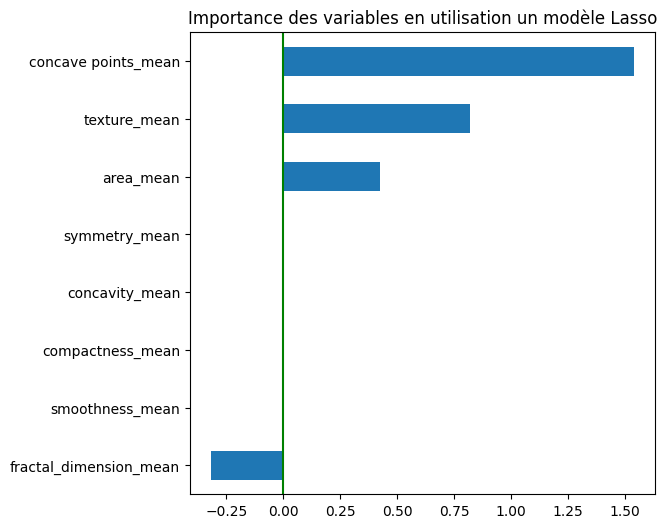

In [ ]:
fig = plt.figure(figsize=(6,6))
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.axvline(x=0, color='g')
plt.title("Importance des variables en utilisation un modèle Lasso")
fig.savefig('importance_graph.png', dpi=200, bbox_inches = 'tight')

Interprétation :
Pour cette première combinaison, quatre variables ont une importance dans le modèle de prédiction.
 - Trois variables (celles de droite) ont un coefficient positif, ce qui indique une relation positive avec la variable cible.
```
'concave points_mean'
'texture_mean'
'area_mean'
```

 - Une variable a un coefficient négatif (celle de gauche), ce qui indique une relation négative  avec la variable cible.
```
'fractal_dimension_mean'
```

Conclusion : on pourrait relancer notre algorithme en supprimant les variables à 0, donc avec peu d'importance sur la prédiction du modèle, à savoir la variable
```
'symmetry_mean'
'concavity_mean'
'compactness_mean'
'smoothness_mean'
```

In [ ]:
# Test sur l'algorithme avec le moins de FN (3) et FP (3)
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

reg = LassoCV()
reg.fit(X_resampled, y_resampled)
coef = pd.Series(reg.coef_, index=X_train.columns)

print("Best score using built-in LassoCV: %f" % reg.score(X_resampled, y_resampled))
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best score using built-in LassoCV: 0.666624
Lasso picked 8 variables and eliminated the other 0 variables


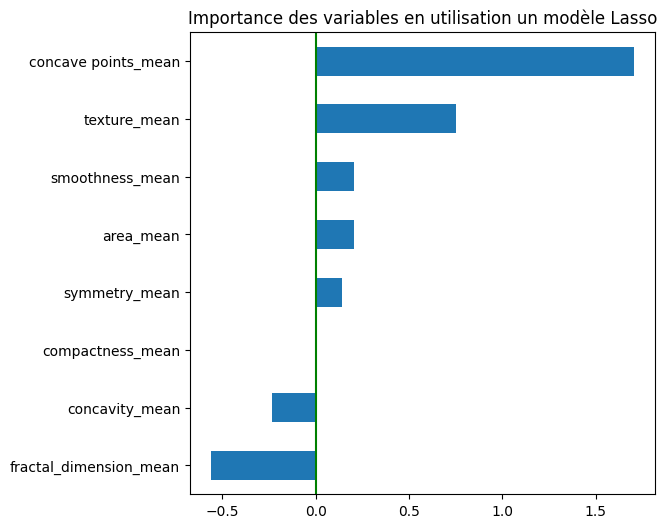

In [ ]:
fig = plt.figure(figsize=(6,6))
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.axvline(x=0, color='g')
plt.title("Importance des variables en utilisation un modèle Lasso")
fig.savefig('importance_graph.png', dpi=200, bbox_inches = 'tight')

Interprétation :
Pour cette deuxième combinaison, sept variables ont une importance dans le modèle de prédiction.
 - Cinq variables (celles de droite) ont un coefficient positif, ce qui indique une relation positive avec la variable cible.
```
'concave points_mean'
'texture_mean'
'smoothness_mean'
'area_mean'
'symmetry_mean'
```

 - Une variable a un coefficient négatif (celle de gauche), ce qui indique une relation négative  avec la variable cible.
```
'concavity_mean'
'fractal_dimension_mean'
```


Conclusion : on pourrait relancer notre algorithme en supprimant les variables à 0, donc avec peu d'importance sur la prédiction du modèle, à savoir la variable
```
'compactness_mean'
```



## Avec l'approche SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler
import shap

In [ ]:
# Test sur l'algorithme avec le meilleur score

X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données avec MaxAbsScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création et entraînement du modèle SVC
model_svc = SVC(probability=True)
model_svc.fit(X_train_scaled, y_train)

# Création de l'explainer SHAP avec KernelExplainer en utilisant shap.sample
background_sample = shap.sample(X_train_scaled, 100)
explainer = shap.KernelExplainer(model_svc.predict_proba, background_sample)

# Obtention des valeurs SHAP pour l'ensemble de test
shap_values = explainer.shap_values(X_test_scaled)

  0%|          | 0/112 [00:00<?, ?it/s]

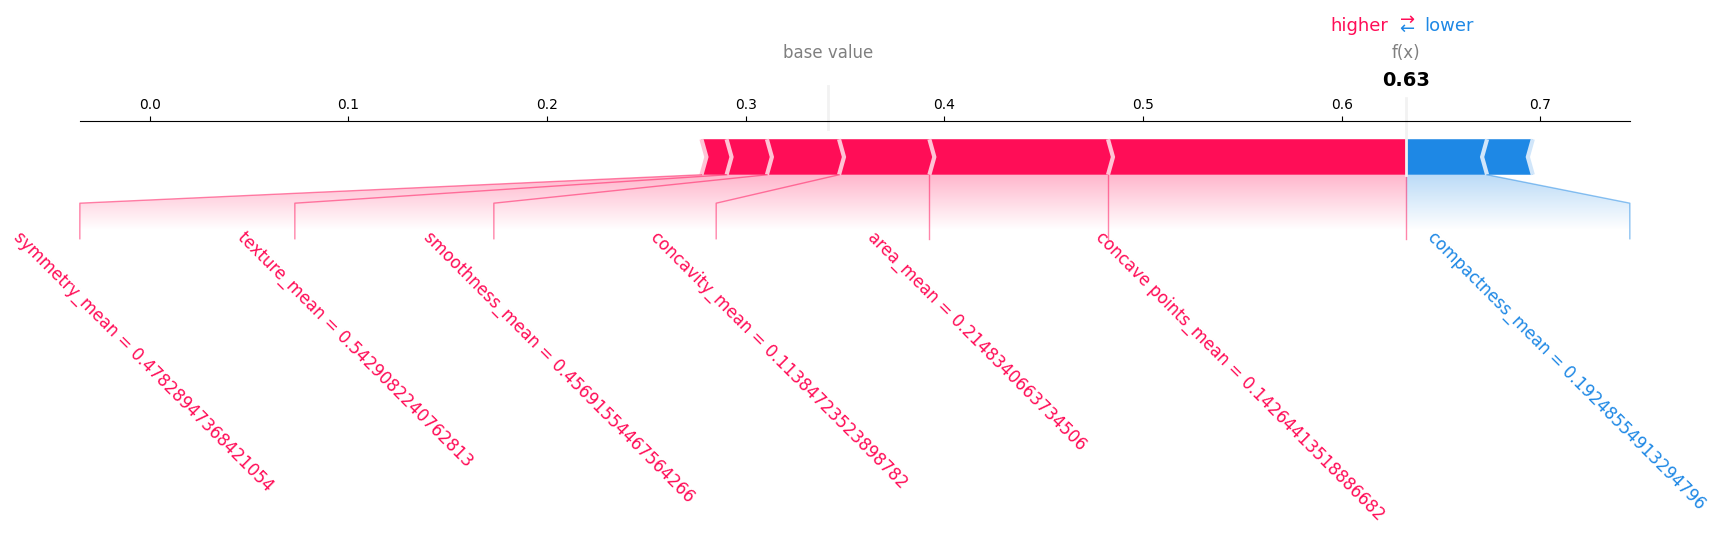

In [ ]:
# Affichage des valeurs SHAP
X_test_shape = pd.DataFrame(X_test_scaled, columns=X_test.columns)
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value[1], shap_values[0][0, :], X_test_shape.iloc[0, :], matplotlib=True, text_rotation=-45)
plt.show()

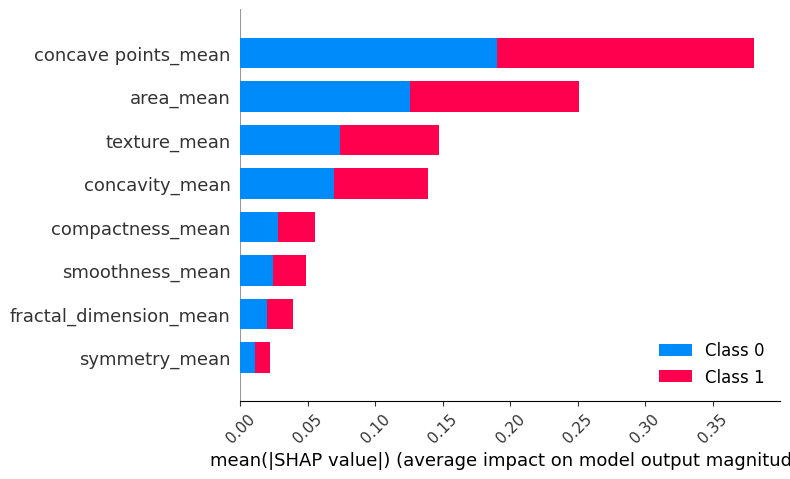

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type='bar', show=False)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Test sur l'algorithme avec le moins de FN (3) et FP (3)
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
import shap

X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Suréchantillonnage
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

# Création et entraînement du modèle LinearSVC
model_linearsvc = LinearSVC()
model_linearsvc.fit(X_resampled, y_resampled)

# Création de l'explainer SHAP avec KernelExplainer en utilisant shap.sample
background_sample = shap.sample(X_resampled, 100)
explainer = shap.KernelExplainer(model_linearsvc.decision_function, background_sample)

# Obtention des valeurs SHAP pour l'ensemble de test
shap_values = explainer.shap_values(X_test_scaled)

  0%|          | 0/112 [00:00<?, ?it/s]

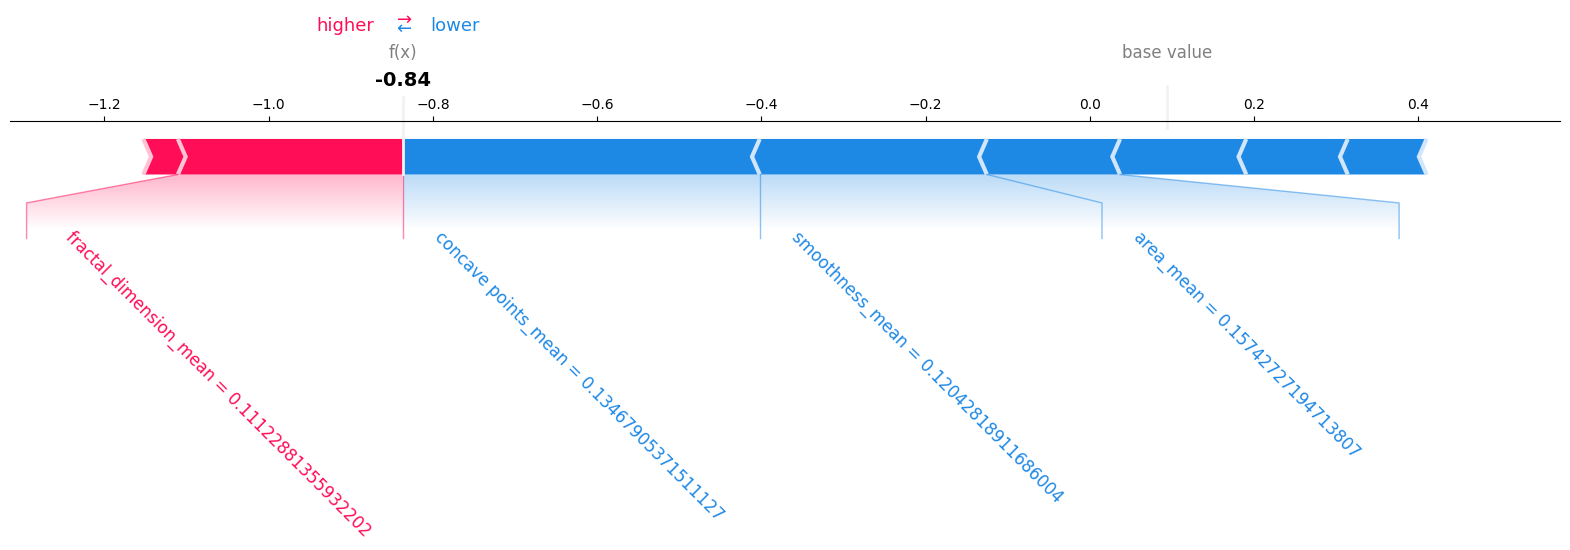

In [ ]:
# Affichage des valeurs SHAP
X_test_shape = pd.DataFrame(X_test_scaled, columns=X_test.columns)
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[0], X_test_shape.iloc[0, :], matplotlib=True, text_rotation=-45)
plt.show()

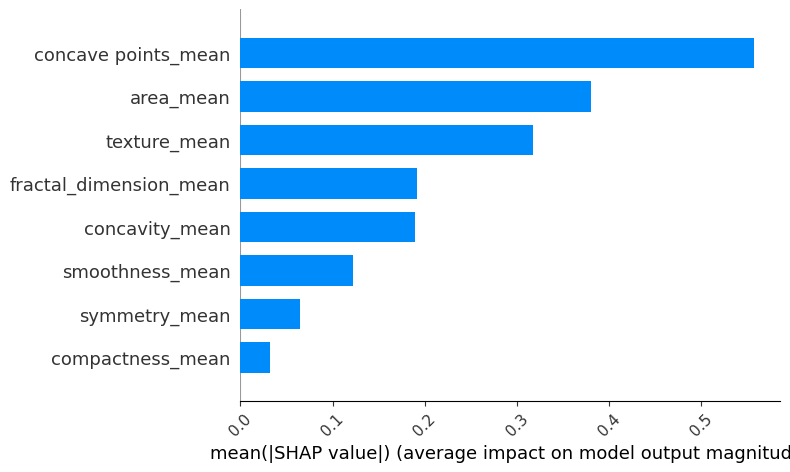

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type='bar', show=False)
plt.xticks(rotation=45)
plt.show()